<a href="https://colab.research.google.com/github/Jesenrique/ComputerVision1/blob/main/TP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

from google.colab.patches import cv2_imshow

In [ ]:
def laplacian_pyramid(img):
  base = img.copy()

  # Creamos la pirámide Gaussiana
  piramide_gauss = [base]
  for i in range(2):
      base = cv.pyrDown(base)
      piramide_gauss.append(base)

  # El último nivel de la Gaussiana permanece en el mismo lugar en la Laplaciana
  punta_laplaciana = piramide_gauss[-1]

  # Creamos la pirámide Laplaciana
  piramide_laplace = [punta_laplaciana]
  for i in range(2,0,-1):
      size = (piramide_gauss[i - 1].shape[1], piramide_gauss[i - 1].shape[0])
      gaussiana_expandida = cv.pyrUp(piramide_gauss[i], dstsize=size)
      laplaciana = cv.subtract(piramide_gauss[i-1], gaussiana_expandida)
      print(laplaciana.shape)
      piramide_laplace.append(laplaciana)
      #cv.imshow('nivel-{}'.format(i-1),laplaciana)

  return piramide_laplace

In [ ]:
def img_scaling(img):
  print(f'Tamaño original: {img.shape}')

  scales = np.linspace(1, 1/6, 5)
  #scales=[1,1/3,1/6]
  resized_imgs = list()

  # generamos nuestra "piramide" de tamaños arbitrarios
  print(f'Dimensiones generadas:')
  for scale in scales:
      resized_imgs.append(cv.resize(img, None, fx=scale, fy=scale))
      print(resized_imgs[-1].shape)

  return resized_imgs

In [ ]:
def sobel_xy(gray):
  # Calculamos el gradiente usando la derivada de Sobel
  sobelx = cv.Sobel(gray, cv.CV_64F, 1, 0)
  sobely = cv.Sobel(gray, cv.CV_64F, 0, 1)

  # Tomamos el valor absoluto del gradiente
  sobelx = np.absolute(sobelx)
  sobely = np.absolute(sobely)

  # Sumamos las gradientes en x e y
  sobel_combined = sobelx + sobely

  # Encontramos el máximo de sobel_combined
  maxGradient = np.max(sobel_combined)

  return maxGradient

In [ ]:
import numpy as np
from skimage.metrics import structural_similarity as ssim

def compare_images(image1, image2):
    # Verificar que ambas imágenes tengan las mismas dimensiones
    if image1.shape != image2.shape:
        raise ValueError("Las imágenes deben tener las mismas dimensiones.")

    # Calcular el índice de similitud estructural (SSIM) entre las imágenes
    similarity = ssim(image1, image2)

    #print(f"Similutud: {similarity}")
    return similarity

In [ ]:
def resize(img):
  print('\nTamaño imagen: {} pix'.format(img.shape))

  #Nivel 1
  img_nivel_1 = cv.pyrDown(img)
  print('\nTamaño imagen: {} pix'.format(img_nivel_1.shape))

  #Nivel 2
  img_nivel_2 = cv.pyrDown(img_nivel_1)
  print('\nTamaño imagen: {} pix'.format(img_nivel_2.shape))

  #Nivel 3
  img_nivel_3 = cv.pyrDown(img_nivel_2)
  print('\nTamaño imagen: {} pix'.format(img_nivel_3.shape))

  return [img, img_nivel_1, img_nivel_2,img_nivel_3]
  #return [ img, img_nivel_1,img_nivel_2,img_nivel_3]

In [ ]:
'''
############ en esta funcion comparo una lista de imagenes upsampling de una misma imagen
def template_match(template,img_list):
  img_scaling_score=[]

  for img in img_list:
      img2=img.copy()

      if template.shape[0] > img.shape[0]:
          continue
          print("yes .")
      if template.shape[1] > img.shape[1]:
          print("yes")
          continue
      w, h = template.shape[::-1]

      # All the 6 methods for comparison in a list
      #methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
      #            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
      methods = ['cv.TM_CCOEFF_NORMED']

      for meth in methods:
          img = img2.copy()

          print(f"tamaño del template: {template.shape}")
          print(f"tamaño de la imagen: {img.shape}")

          method = eval(meth)
          # Apply template Matching
          res = cv.matchTemplate(img2,template,method)
          min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
          # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
          if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
              top_left = min_loc
          else:
              top_left = max_loc
          #print(f"valor maximo: {max_val}\nvalor minimo: {min_val}")

          a=img[top_left[1]:top_left[1]+h,top_left[0]:top_left[0]+w]
          b=template
          similitud=compare_images(a,b)

          img_scaling_score.append(similitud)
          print(f"Similitud {similitud}")

          #print(f"lista de puntuacion por imagenes: {img_scaling_score}")
          best_score_img=img_scaling_score.index(max(img_scaling_score))

          bottom_right = (top_left[0] + w, top_left[1] + h)
          cv.rectangle(img2,top_left, bottom_right, 255, 2)
          plt.subplot(121),plt.imshow(img2,cmap = 'gray')
          plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
          plt.subplot(122),plt.imshow(template,cmap = 'gray')
          plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
          plt.suptitle(meth)
          plt.show()
'''

'\n############ en esta funcion comparo una lista de imagenes upsampling de una misma imagen\ndef template_match(template,img_list):\n  img_scaling_score=[]\n\n  for img in img_list:\n      img2=img.copy()\n\n      if template.shape[0] > img.shape[0]:\n          continue\n          print("yes .")\n      if template.shape[1] > img.shape[1]:\n          print("yes")\n          continue\n      w, h = template.shape[::-1]\n\n      # All the 6 methods for comparison in a list\n      #methods = [\'cv.TM_CCOEFF\', \'cv.TM_CCOEFF_NORMED\', \'cv.TM_CCORR\',\n      #            \'cv.TM_CCORR_NORMED\', \'cv.TM_SQDIFF\', \'cv.TM_SQDIFF_NORMED\']\n      methods = [\'cv.TM_CCOEFF_NORMED\']   \n\n      for meth in methods:\n          img = img2.copy()\n\n          print(f"tamaño del template: {template.shape}")\n          print(f"tamaño de la imagen: {img.shape}")\n\n          method = eval(meth)\n          # Apply template Matching\n          res = cv.matchTemplate(img2,template,method)\n          mi

In [ ]:
'''
template= cv.imread('/content/drive/MyDrive/Fotos Colab/pattern.png', cv.IMREAD_GRAYSCALE)
assert template is not None, "file could not be read, check with os.path.exists()"

#imagen_norm = cv.equalizeHist(~template)

#template = cv.resize(template, None, fx=1.1, fy=1.1, interpolation = cv.INTER_CUBIC)

#template = cv.Sobel(template,cv.CV_8U,1,0,ksize=3)
#_, template = cv.threshold(template, 100, 255, cv.THRESH_BINARY)
#template = cv.Sobel(template,cv.CV_8U,1,0,ksize=3)

max_gradient=sobel_xy(template)
threshold1 = 0.15 * max_gradient
threshold2 = 0.3 * max_gradient
template = cv.Canny(template,threshold1,threshold2)

#list_template=resize(template)
'''

'\ntemplate= cv.imread(\'/content/drive/MyDrive/Fotos Colab/pattern.png\', cv.IMREAD_GRAYSCALE)\nassert template is not None, "file could not be read, check with os.path.exists()"\n\n#imagen_norm = cv.equalizeHist(~template)\n\n#template = cv.resize(template, None, fx=1.1, fy=1.1, interpolation = cv.INTER_CUBIC)\n\n#template = cv.Sobel(template,cv.CV_8U,1,0,ksize=3)\n#_, template = cv.threshold(template, 100, 255, cv.THRESH_BINARY)\n#template = cv.Sobel(template,cv.CV_8U,1,0,ksize=3)\n\nmax_gradient=sobel_xy(template)\nthreshold1 = 0.15 * max_gradient  \nthreshold2 = 0.3 * max_gradient\ntemplate = cv.Canny(template,threshold1,threshold2)\n\n#list_template=resize(template)\n'

In [ ]:
'''
imagenes=["COCA-COLA-LOGO.jpg", "coca_retro_1.png", "coca_retro_2.png", "logo_1.png","coca_logo_1.png", "coca_logo_2.png"]
for img in imagenes:
  path='/content/drive/MyDrive/Fotos Colab/'+img

  img = cv.imread(path, cv.IMREAD_GRAYSCALE)
  assert img is not None, "file could not be read, check with os.path.exists()"

  max_gradient=sobel_xy(img)
  threshold1 = 0.35 * max_gradient
  threshold2 = 0.5 * max_gradient
  img = cv.Canny(img,threshold1,threshold2)

  ancho=1200
  if img.shape[1]<ancho:
    scale=ancho/img.shape[1]
    img = cv.resize(img, None, fx=scale, fy=scale)
  else:
    scale=ancho/img.shape[1]
    img = cv.resize(img, None, fx=scale, fy=scale)

  img_pyramid=img_scaling(img)
  template_match(template,img_pyramid)

#img2=img_n.copy()
'''

'\nimagenes=["COCA-COLA-LOGO.jpg", "coca_retro_1.png", "coca_retro_2.png", "logo_1.png","coca_logo_1.png", "coca_logo_2.png"]\nfor img in imagenes:\n  path=\'/content/drive/MyDrive/Fotos Colab/\'+img\n\n  img = cv.imread(path, cv.IMREAD_GRAYSCALE)\n  assert img is not None, "file could not be read, check with os.path.exists()"\n  \n  max_gradient=sobel_xy(img)\n  threshold1 = 0.35 * max_gradient  \n  threshold2 = 0.5 * max_gradient\n  img = cv.Canny(img,threshold1,threshold2)\n\n  ancho=1200\n  if img.shape[1]<ancho:\n    scale=ancho/img.shape[1]\n    img = cv.resize(img, None, fx=scale, fy=scale)\n  else:\n    scale=ancho/img.shape[1]\n    img = cv.resize(img, None, fx=scale, fy=scale)\n\n  img_pyramid=img_scaling(img)\n  template_match(template,img_pyramid)\n\n#img2=img_n.copy()\n'

In [ ]:
'''
def template_match(template_list,img,img2):
  img_scaling_score=[]

  for template in template_list:

      w, h = template.shape[::-1]

      # All the 6 methods for comparison in a list
      #methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
      #            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
      methods = ['cv.TM_CCORR_NORMED']

      for meth in methods:
          img = img2.copy()

          print(f"tamaño del template: {template.shape}")
          print(f"tamaño de la imagen: {img.shape}")

          method = eval(meth)
          # Apply template Matching

          res = cv.matchTemplate(img,template,method)
          min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
          # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
          if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
              top_left = min_loc
          else:
              top_left = max_loc
          print(f"valor maximo: {max_val}\nvalor minimo: {min_val}")

          a=img[top_left[1]:top_left[1]+h,top_left[0]:top_left[0]+w]
          b=template
          similitud=compare_images(a,b)

          img_scaling_score.append(similitud)
          print(f"Similitud {similitud}")

          #print(f"lista de puntuacion por imagenes: {img_scaling_score}")
          best_score_img=img_scaling_score.index(max(img_scaling_score))

          bottom_right = (top_left[0] + w, top_left[1] + h)
          cv.rectangle(img,top_left, bottom_right, 255, 2)
          plt.subplot(121),plt.imshow(res,cmap = 'gray')
          plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
          plt.subplot(122),plt.imshow(img,cmap = 'gray')
          plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
          plt.suptitle(meth)
          plt.show()
'''

In [ ]:

def template_match(template_list,img,img2,image):
#almacenar puntaje de cada imagen sobre el metodo
  template_scaling_score=[]

  for template in template_list:
    w, h = template.shape[::-1]
    img = img2.copy()
    methods = ['cv.TM_CCORR_NORMED']

    for meth in methods:
      #print(f"tamaño del template: {template.shape}")
      #print(f"tamaño de la imagen: {img.shape}")
      method = eval(meth)
      # Apply template Matching

      res = cv.matchTemplate(img,template,method)
      min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
      # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
      if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
          top_left = min_loc
      else:
          top_left = max_loc
      #print(f"valor maximo: {max_val}\nvalor minimo: {min_val}")

      a=img[top_left[1]:top_left[1]+h,top_left[0]:top_left[0]+w]
      b=template
      similitud=compare_images(a,b)
      if image == "coca_retro_2.png" or image == "coca_multi.png":
        template_scaling_score.append(max_val)
      else:
        template_scaling_score.append(similitud)
  print(template_scaling_score)
  print(template_scaling_score.index(max(template_scaling_score)))
  return template_scaling_score.index(max(template_scaling_score))

def plot_match(img,template,img_rgb):
  w, h = template.shape[::-1]
  img = img2.copy()
  # Apply template Matching
  res = cv.matchTemplate(img,template,cv.TM_CCORR_NORMED)
  min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
  # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
  top_left = max_loc
  a=img[top_left[1]:top_left[1]+h,top_left[0]:top_left[0]+w]
  b=template
  similitud=compare_images(a,b)
  print(f"Similitud {similitud}")

  bottom_right = (top_left[0] + w, top_left[1] + h)
  cv.rectangle(img_rgb,top_left, bottom_right, (255,255,0), 5)
  plt.subplot(121),plt.imshow(res,cmap = 'gray')
  plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
  plt.subplot(122),plt.imshow(img_rgb)
  plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
  plt.suptitle("cv.TM_CCORR_NORMED")
  plt.show()

'''
  bottom_right = (top_left[0] + w, top_left[1] + h)
  cv.rectangle(img,top_left, bottom_right, 255, 2)
  plt.subplot(121),plt.imshow(res,cmap = 'gray')
  plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
  plt.subplot(122),plt.imshow(img,cmap = 'gray')
  plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
  plt.suptitle("cv.TM_CCORR_NORMED")
  plt.show()
'''


'\n  bottom_right = (top_left[0] + w, top_left[1] + h)\n  cv.rectangle(img,top_left, bottom_right, 255, 2)\n  plt.subplot(121),plt.imshow(res,cmap = \'gray\')\n  plt.title(\'Matching Result\'), plt.xticks([]), plt.yticks([])\n  plt.subplot(122),plt.imshow(img,cmap = \'gray\')\n  plt.title(\'Detected Point\'), plt.xticks([]), plt.yticks([])\n  plt.suptitle("cv.TM_CCORR_NORMED")\n  plt.show() \n'

Tamaño original: (175, 400)
Dimensiones generadas:
(175, 400)
(139, 317)
(102, 233)
(66, 150)
(29, 67)


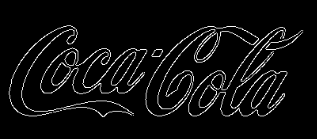

In [ ]:
template= cv.imread('/content/drive/MyDrive/Fotos Colab/pattern.png', cv.IMREAD_GRAYSCALE)
assert template is not None, "file could not be read, check with os.path.exists()"

_, template = cv.threshold(~template, 100, 255, cv.THRESH_BINARY)

max_gradient=sobel_xy(template)
threshold1 = 0.01 * max_gradient
threshold2 = 0.1 * max_gradient
template = cv.Canny(template,threshold1,threshold2)

list_template=img_scaling(template)
cv2_imshow(list_template[1])


[0.46242249729832297, 0.35189268281754765, 0.33249402165729924, 0.2189413815259684, 0.0946172624360265]
0
Similitud 0.46242249729832297


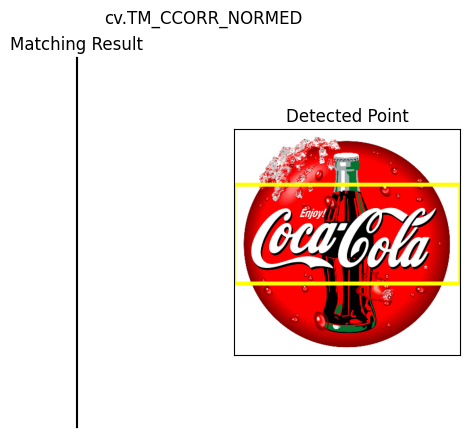

[0.39535932520850287, 0.39129307955748, 0.2550081198080427, 0.17484706193892993, 0.10134733464923104]
0
Similitud 0.39535932520850287


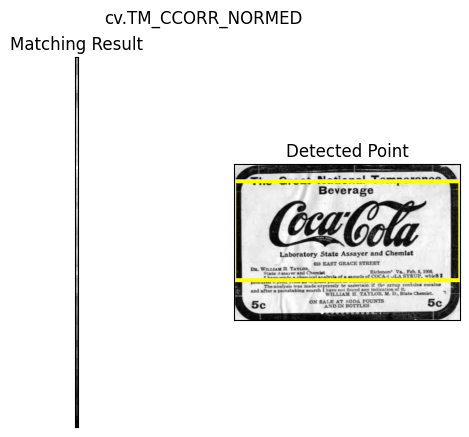

[0.06010875850915909, 0.09117516875267029, 0.13566400110721588, 0.1720166951417923, 0.31045669317245483]
4
Similitud 0.14144441402680635


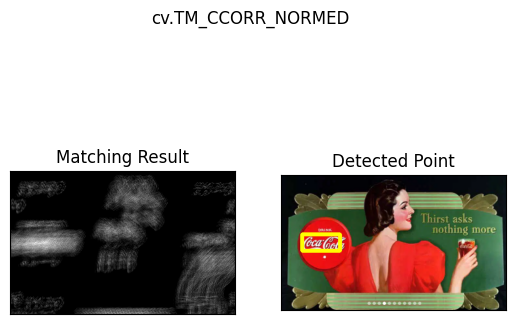

[0.5540902165888512, 0.49965524058462596, 0.39071634103208985, 0.2580678691764366, 0.10851151700119313]
0
Similitud 0.5540902165888512


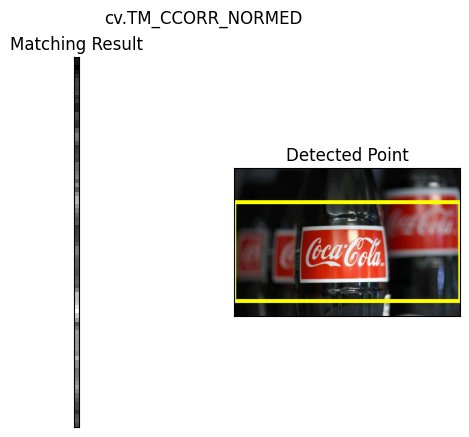

[0.4625562539577715, 0.4676743948910436, 0.26724899571371, 0.1575493185397198, 0.10471024462047865]
1
Similitud 0.4676743948910436


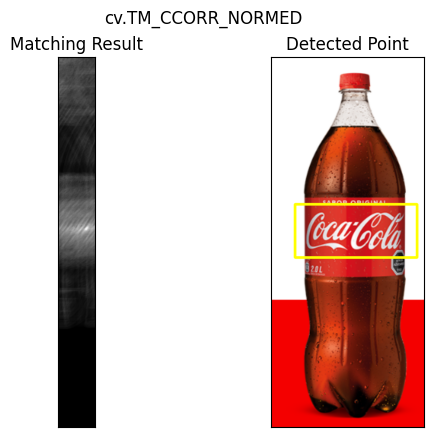

[0.4326620968694707, 0.3183298760299494, 0.22389762984900013, 0.19822641800067786, 0.05761274506985895]
0
Similitud 0.4326620968694707


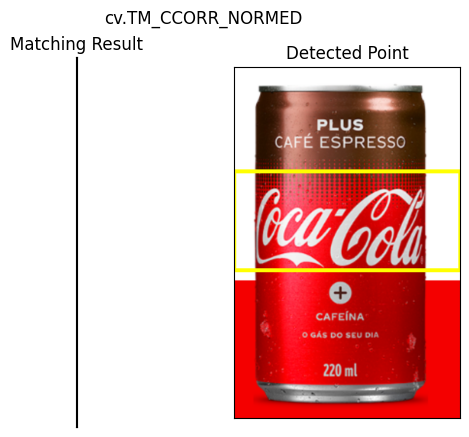

[0.10751274973154068, 0.1468806266784668, 0.15500576794147491, 0.18958885967731476, 0.31300801038742065]
4
Similitud 0.14526624946985178


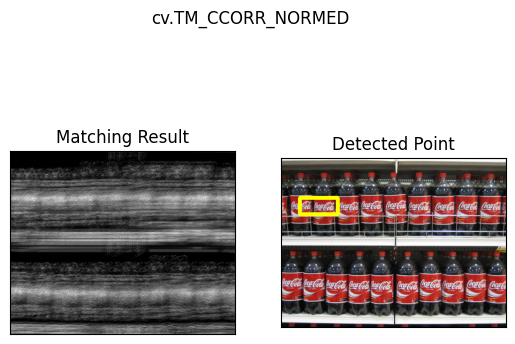

In [ ]:
################test para acomodar cada imagen a la medida del template 400 de ancho
################ hago downsampling del template
imagenes=["COCA-COLA-LOGO.jpg", "coca_retro_1.png", "coca_retro_2.png", "logo_1.png","coca_logo_1.png", "coca_logo_2.png","coca_multi.png"]
for image in imagenes:
  path='/content/drive/MyDrive/Fotos Colab/'+image

  if image == "coca_retro_1.png":
    img = cv.imread(path, cv.IMREAD_GRAYSCALE)
    img =~img
  else:
    img = cv.imread(path, cv.IMREAD_GRAYSCALE)

  _, img = cv.threshold(img, 200, 255, cv.THRESH_BINARY)

  img_c = cv.imread(path)
  img_rgb= cv.cvtColor(img_c, cv.COLOR_BGR2RGB)

  max_gradient=sobel_xy(img)
  threshold1 = 0.01 * max_gradient
  threshold2 = 0.50 * max_gradient
  img = cv.Canny(img,threshold1,threshold2)

  ancho=400
  if img.shape[1]<ancho:
    scale=ancho/img.shape[1]
    img = cv.resize(img, None, fx=scale, fy=scale)
    img_rgb = cv.resize(img_rgb, None, fx=scale, fy=scale)
  else:
    scale=ancho/img.shape[1]
    img = cv.resize(img, None, fx=scale, fy=scale)
    img_rgb = cv.resize(img_rgb, None, fx=scale, fy=scale)

  img2=img.copy()

  #img_pyramid=img_scaling(img)
  #template_match(list_template,img,img2)
  index=template_match(list_template,img,img2,image)
  plot_match(img,list_template[index],img_rgb)